<a href="https://colab.research.google.com/github/AmanPriyanshu/Understanding-Quantum-With-Qiskit/blob/master/Qiskit_circuit_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Circuit 2:

Installing Qiskit

In [0]:
pip install qiskit -q

In [0]:
pip install qiskit-terra[visualization] -q

### Restart the Notebook if on Google Colab
After execution of:


```
# pip install qiskit-terra[visualization] -q
```


Importing Everything From Qiskit

In [0]:
from qiskit import *

In [0]:
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

# Bernstein-Vazirani Algorithm

In [0]:
secret_number = '101001'

Defining the Circuit

In [94]:
circuit = QuantumCircuit(6+1, 6)
circuit.h([0,1,2,3,4,5])
circuit.x(6)
circuit.h(6)
circuit.barrier()

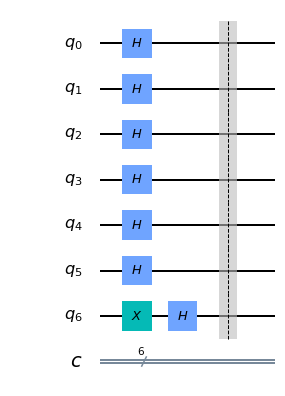

In [95]:
circuit.draw(output='mpl')

In [96]:
circuit.cx(5, 6)
circuit.cx(3, 6)
circuit.cx(0, 6)

circuit.barrier()

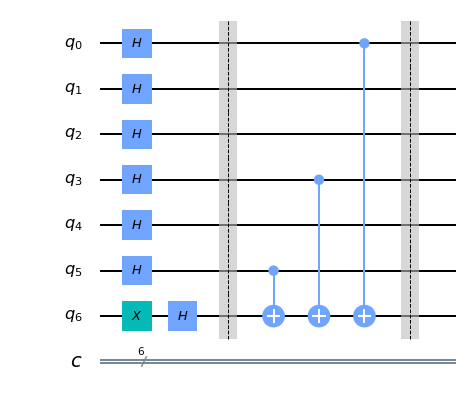

In [97]:
circuit.draw(output='mpl')

In [98]:
circuit.h([0,1,2,3,4,5])

circuit.barrier()

### MEASURING CIRCUIT

In [99]:
circuit.measure([0,1,2,3,4,5], [0,1,2,3,4,5])

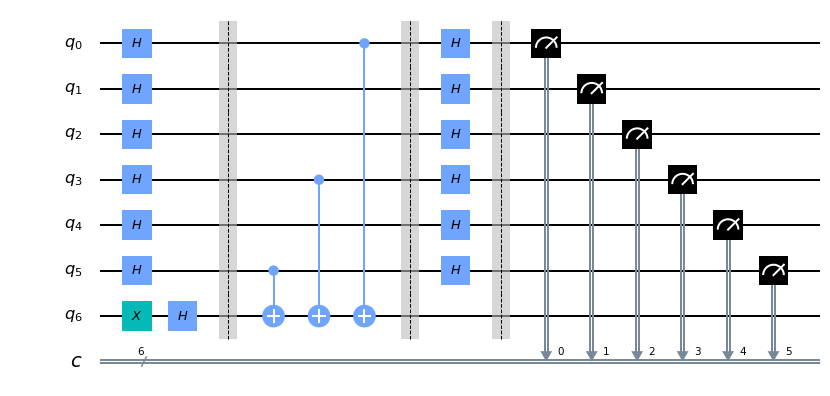

In [100]:
circuit.draw(output='mpl')

### SIMULATING THE CIRCUIT

In [0]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1)
result = job.result()
counts = result.get_counts()

In [102]:
print(counts)

{'101001': 1}


RE-CREATING FOR A GENERAL CASE:

In [103]:
secret_number = input('Secret Number:\t')

Secret Number:	11010101


In [104]:
circuit = QuantumCircuit(len(secret_number)+1, len(secret_number))
circuit.h(range(len(secret_number)))
circuit.x(len(secret_number))
circuit.h(len(secret_number))
circuit.barrier()

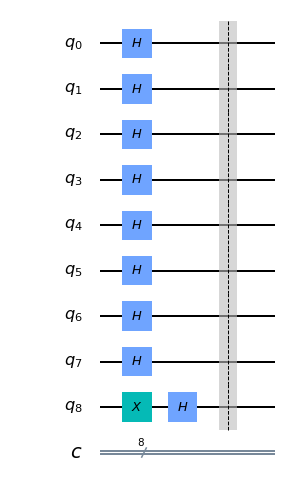

In [105]:
circuit.draw(output='mpl')

In [106]:
for i, if_one in enumerate(reversed(secret_number)):
  if if_one == '1':
    circuit.cx(i, len(secret_number))

circuit.barrier()

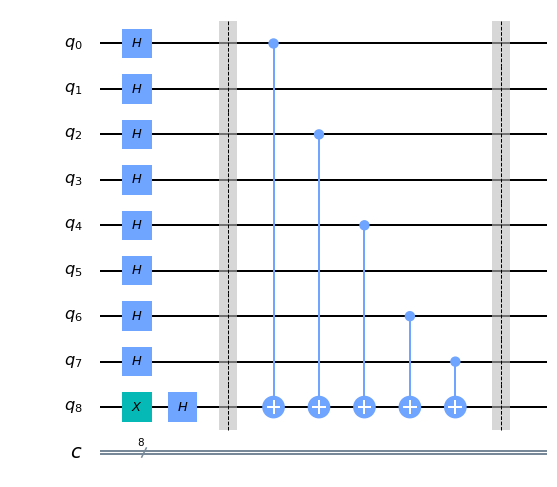

In [107]:
circuit.draw(output='mpl')

In [108]:
circuit.h(range(len(secret_number)))
circuit.measure(range(len(secret_number)), range(len(secret_number)))

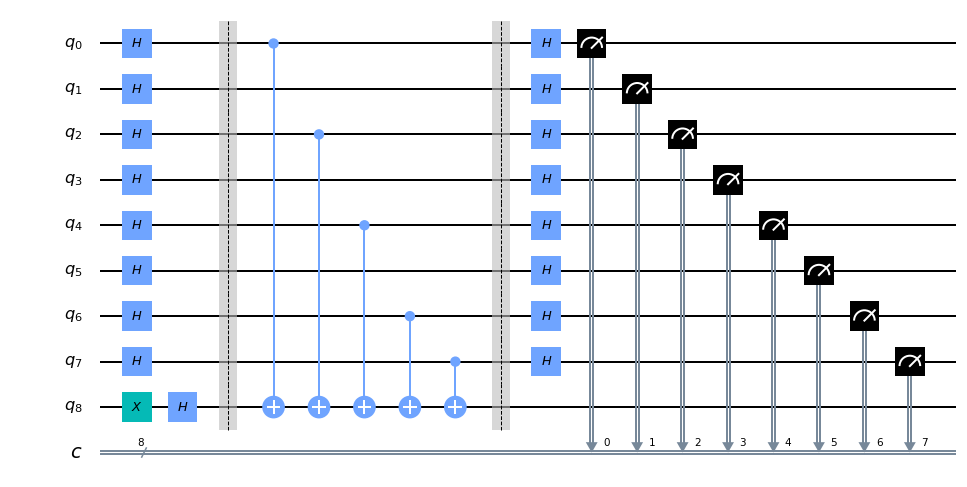

In [109]:
circuit.draw(output='mpl')

In [0]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1)
result = job.result()
counts = result.get_counts()

In [111]:
print(counts)

{'11010101': 1}


### CONCEPT:

Two sequential Hadamard Gate results in the original input. However, finding a 1 would invert it resulting in an inverted output. Let us try different variations.

In [118]:
circuit = QuantumCircuit(3, 3)
circuit.h(0)
circuit.h(1)
circuit.h(0)
circuit.x(2)
circuit.h(2)
circuit.cx(1,2)
circuit.h(1)
circuit.measure([1],[1])

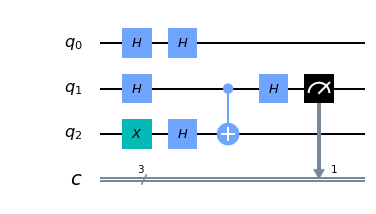

In [119]:
circuit.draw(output='mpl')

In [0]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=10)
result = job.result()
counts = result.get_counts()

In [121]:
print(counts)

{'010': 10}


The only output we get is 1 here q(1). Whereas, q(0) will always be 0.